# Asset Management Project

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import ffn 
import os
import yfinance as yf
import pandas as pd
import seaborn as sns
import datetime as dt

sns.set(style='darkgrid')
sns.mpl.rc('figure', figsize=(7, 5))
sns.mpl.rc('font', size = 12)

pd.set_option('display.max_columns', 100)

## Investment Univers

We have to find 5 - 8 titles to use.

To choose the title, we will use a fundamental stock criterion. I will define them here for educational purposes.

1- **Earnings per share (EPS)**:  EPS measures a company's profitability by showing how much profit is allocated to each outstanding share.

\begin{equation}
EPS = \frac{Net Income - PreferredDividends}{Outstanding Shares}
\end{equation}

2- **Price to Earnings (P/E) ratio**: The P/E ratio is a valuation ratio of a company's current share price compared to its per-share earnings.

\begin{equation}
P/E = \frac{Price per Share}{Earnings per Share}
\end{equation}

3- **Price to Book (P/B) ratio**: The P/B ratio is a valuation ratio that compares a company's stock price to its book value.

\begin{equation}
P/B = \frac{Price per Share}{Book Value per Share}
\end{equation}

Book Value is the total value of the company's assets that shareholders would theoretically receive if a company were liquid minus the liabilities.

4- **Enterprise Value to EBITDA (EV/EBITDA) ratio**: is used to measure a company's total valuation relative to its earnings before interest, taxes, depreciation, and amortization.

\begin{equation}
EV/EBITDA = \frac{Enterprise Value}{EBITDA}
\end{equation}

EBITDA shows how much money your business is making before paying for taxes, interest, or depreciation. It helps compare companies without worrying about their loans or tax tricks. EBIDTA = Revenue - Basic Costs

5- **Return on Equity (ROE)**: ROE measures a corporation's profitability by revealing how much profit a company generates with the money shareholders have invested.

\begin{equation}
ROE = \frac{Net Income}{Shareholder's Equity}
\end{equation}

6- **Return on Invested Capital (ROIC)**: ROIC measures how effectively a company uses the money invested in its operations to generate profit.

\begin{equation}
ROIC = \frac{Net Income - dividends}{Total Capital Invested} \times 100
\end{equation}

Total Capital Invested = Total Debt + Shareholder's Equity (Money invested by shareholders)

7- **Dividend Yield**: The dividend yield is the financial ratio that measures the quantum of cash dividends paid out to shareholders relative to the market value per share.

\begin{equation}
Dividend Yield = \frac{Annual Dividends per Share}{Price per Share} \times 100
\end{equation}

8- **Debt to Equity (D/E) ratio**: D/E Ratio measures a company's financial leverage by comparing total debt to shareholders' equity.

\begin{equation}
D/E = \frac{Total Debt}{Shareholder's Equity}
\end{equation}


| Metric | Definition | Ideal Range |
| --- | --- | --- |
| EPS | Profit per outstanding share | Higher is better|
| P/E Ratio | Stock price vs. earning | 	<20 (Varies by sector)|
| P/B Ratio | Stock price vs. book value | <3 (Depends on industry)|
| EV/EBITDA | Enterprise value relative to EBITDA | <10|
| ROE (%) | Profitability from shareholders’ equity | >15%|
| ROIC (%) | Efficiency of capital usage | >10%|
| Dividend Yield | 	Dividend payout relative to stock price | 	>2%|
| D/E Ratio | Financial leverage (Debt vs. Equity) | 	<1.5|


In [2]:
industries = {
    "Technology": ["ASML", "SAP", "IFX.DE", "NVDA", "AMD", "MSFT", "GOOGL", "AAPL", "U", "SNOW", "CRWD", "PLTR", "MDB"],
    "Healthcare": ["SAN.PA", "NVO", "SRT.DE", "JNJ", "PFE", "MRNA", "AZN.L", "GSK.L", "VRTX", "REGN", "BNTX", "ILMN", "EXAS"],
    "Renewable Energy": ["ENR.DE", "ENEL.MI", "ORSTED.CO", "NEE", "VWS.CO", "BEP", "PLUG", "RUN", "FCEL", "ENPH", "SEDG", "SHLS", "FSLR"],
    "Consumer Staples": ['CENCOSUD.SN', 'FALABELLA.SN', "ULVR.L", "NESN.SW", "BN.PA", "KO", "PG", "PEP", "CL", "KHC", "TWNK", "CELH", "OTLY", "BYND", "LANC"],
    "Utilities": ["IBE.MC", "ENGI.PA", "DUK", "SO", "D", "AEP", "NG.L", "CEG", "NEP", "AQN", "CWEN", "SPWR"],
    "Financials": ['BCH', "CS.PA", 'BNP.PA', "ALV.DE", "JPM", "BAC", "GS", "MS", "HSBA.L", "SOFI", "AFRM", "UPST", "LC", "ALLY"],
    "Luxury & Consumer Discretionary": ["MC.PA", "RMS.PA", "OR.PA", "NKE", "ADS.DE", "RACE", "CFR.SW", "BRBY.L", "DECK", "ONON", "FIGS", "CROX", "SKX"],
    'Mining' : ['SQM', 'LIT', 'LAC', 'ALB', 'LTHM', 'GALXF', 'LTHU'],
    'Biotechnology' : ['AMGN', 'GILD', 'BMY', 'MRK', 'ABBV', 'LLY', 'PFE', 'NVO', 'AZN', 'REGN', 'VRTX', 'BIIB', 'SGEN'],
}

tickers = [ticker for tickers in industries.values() for ticker in tickers]

stock_data = []

for industry, tickers in industries.items():
    for ticker in tickers:

        try:
            stock = yf.Ticker(ticker)
            info = stock.info
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
        
        try:
            stock_data.append({
                "Ticker": ticker,
                "Industry": industry,
                "EPS": info.get("trailingEps"),
                "P/E Ratio": info.get("trailingPE"),
                "P/B Ratio": info.get("priceToBook"),
                "EV/EBITDA": info.get("enterpriseToEbitda"),
                "ROE (%)": info.get("returnOnEquity", 0) * 100 if info.get("returnOnEquity") else None,
                "Dividend Yield (%)": info.get("dividendYield", 0) * 100 if info.get("dividendYield") else 0,
                "Debt-to-Equity": info.get("debtToEquity")
            })
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")

# Convert to DataFrame
df = pd.DataFrame(stock_data)
df

Error fetching data for NEP: list index out of range


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPWR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SPWR&crumb=lAwCjldci1K


Error fetching data for SPWR: 'NoneType' object has no attribute 'update'


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LTHM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LTHM&crumb=lAwCjldci1K


Error fetching data for LTHM: 'NoneType' object has no attribute 'update'
Error fetching data for GALXF: list index out of range


,Ticker,Industry,EPS,P/E Ratio,P/B Ratio,EV/EBITDA,ROE (%),Dividend Yield (%),Debt-to-Equity
0,ASML,Technology,20.72,35.338802,15.585449,28.422,47.427000,105.0,27.410
1,SAP,Technology,2.85,97.122800,7.106364,36.162,7.062000,86.0,22.164
2,IFX.DE,Technology,1.07,33.668224,2.749161,11.425,8.035000,97.0,29.279
3,NVDA,Technology,2.94,38.329933,34.770134,32.607,119.177010,4.0,12.946
4,AMD,Technology,1.00,100.310000,2.826271,31.017,2.893000,0.0,4.032
...,...,...,...,...,...,...,...,...,...
108,AZN,Biotechnology,2.25,34.444443,2.946320,8.265,17.593999,200.0,74.527
109,REGN,Biotechnology,38.35,18.448763,2.586250,15.049,15.951000,50.0,10.012
110,VRTX,Biotechnology,-2.10,NaN,7.645659,25.347,-3.152000,0.0,10.661
111,BIIB,Biotechnology,11.17,13.462848,1.311644,8.797,10.358000,0.0,40.181


In [3]:
min_index = df.sort_values(
    by=["Industry", "P/E Ratio"], ascending=[True, True]
    ).groupby(
        "Industry"
    )['P/E Ratio'].idxmin()
    
min_row = df.loc[min_index]  
min_row

,Ticker,Industry,EPS,P/E Ratio,P/B Ratio,EV/EBITDA,ROE (%),Dividend Yield (%),Debt-to-Equity
111,BIIB,Biotechnology,11.17,13.462848,1.311644,8.797,10.358000,0.0,40.181
48,KHC,Consumer Staples,2.26,14.238938,0.781846,8.924,5.545000,497.0,41.460
68,BNP.PA,Financials,9.57,8.001045,0.745555,NaN,9.267000,626.0,NaN
22,REGN,Healthcare,38.35,18.448763,2.586250,15.049,15.951000,50.0,10.012
91,CROX,Luxury & Consumer Discretionary,15.88,6.287153,3.072851,6.373,57.761000,0.0,92.677
94,LIT,Mining,NaN,26.003782,NaN,NaN,NaN,93.0,NaN
38,FSLR,Renewable Energy,12.02,11.574875,1.867141,7.606,17.621000,0.0,9.010
6,GOOGL,Technology,8.03,21.651308,6.530689,15.845,32.908002,46.0,8.655
63,AQN,Utilities,0.54,8.888889,0.814249,14.458,-0.147000,542.0,108.555


We will use the companies with the lowest P/E ratio. This is an arbitrary decision, just to continue with the homework.

In [4]:
portfolio_tickers = min_row['Ticker'].tolist()

data = pd.DataFrame()

for ticker_symbol in portfolio_tickers:
    ticker = yf.Ticker(ticker_symbol)
    ticker_data = ticker.history(period="15y")
    ticker_data.index = ticker_data.index.normalize().tz_localize(None)
    data[ticker_symbol] = ticker_data['Close']

In [5]:
data = data.dropna()
data.head()

,BIIB,KHC,BNP.PA,REGN,CROX,LIT,FSLR,GOOGL,AQN
Date,,,,,,,,,
2015-07-06,404.630005,48.088276,29.051033,511.582581,14.59,19.194935,44.189999,27.182461,4.441886
2015-07-07,408.059998,49.188988,28.229309,516.945679,14.72,18.724642,45.119999,27.402164,4.521534
2015-07-08,397.679993,49.696507,28.469679,508.646362,14.30,18.062750,43.270000,26.987169,4.490901
2015-07-09,399.290009,49.301052,29.280218,508.376709,14.44,18.202093,43.650002,27.134136,4.405127
2015-07-10,388.230011,50.955391,30.459707,525.334900,14.59,18.846573,44.029999,27.705067,4.435759


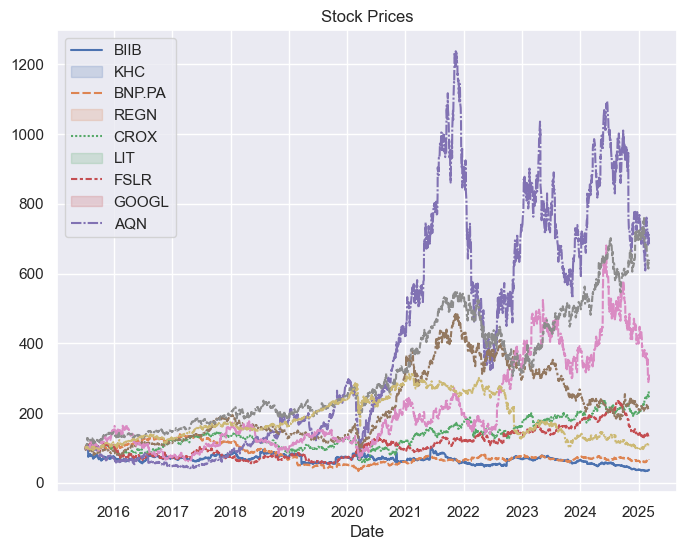

In [6]:
plt.figure(figsize=(8, 6))
plt.title("Stock Prices")
sns.lineplot(data=data.rebase())
plt.legend(data.columns)
plt.show()

## Dynamic Benchmark

The benchmark for the dynamic portfolio will be the SX5E which the ticker is `^STOXX50E`.

In [7]:
ticker = yf.Ticker('^STOXX50E')
ticker_data = ticker.history(period="15y")
benchmark = ticker_data['Close']
benchmark.index = benchmark.index.normalize().tz_localize(None)
benchmark = benchmark.dropna()
benchmark = benchmark.loc[data.index[0]:data.index[-1]]

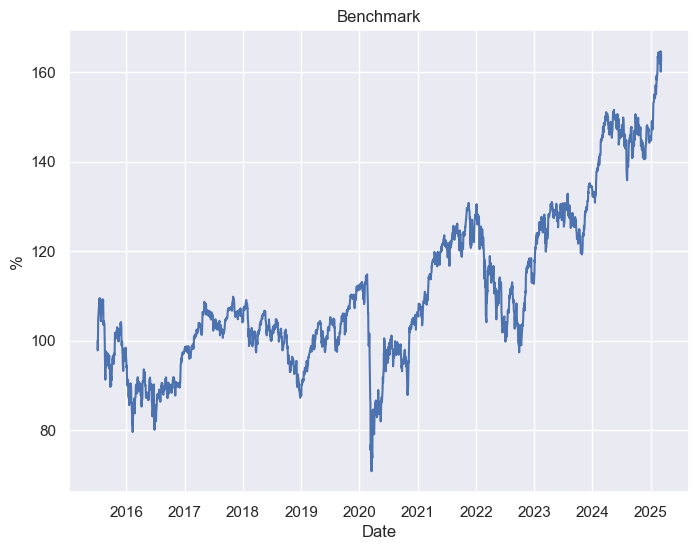

In [8]:
plt.figure(figsize=(8, 6))
plt.title("Benchmark")
sns.lineplot(data=benchmark / benchmark.iloc[0] * 100) 
plt.ylabel("%")
plt.show()

to_returns does $ \frac{P_{t} - P_{t-1}}{P_{t-1}} $

In [9]:
returns_benchmark = benchmark.to_returns().dropna()

In [10]:
def create_monthly_table(return_series, num_of_components):
    return_series.rename('weighted rets',inplace=True)
    return_series = (return_series/ float(num_of_components))
    returns_df_m = pd.DataFrame((return_series + 1).resample('ME').prod() - 1)
    returns_df_m['Month'] = returns_df_m.index.month
    monthly_table = returns_df_m[['weighted rets','Month']].pivot_table(returns_df_m[['weighted rets','Month']], index=returns_df_m.index, columns='Month', aggfunc='sum').resample('YE')
    monthly_table = monthly_table.aggregate('sum')
    monthly_table.columns = monthly_table.columns.droplevel()
    monthly_table.index = monthly_table.index.year
    monthly_table['YTD'] = ((monthly_table + 1).prod(axis=1) - 1)
    monthly_table = monthly_table * 100
    monthly_table.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','YTD']
    return monthly_table.round(2).fillna("")

In [11]:
create_monthly_table(returns_benchmark, 1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
Date,,,,,,,,,,,,,
2015,0.00,0.00,0.00,0.00,0.00,0.00,7.00,-9.19,-5.17,10.24,2.58,-6.23,-2.29
2016,-7.39,-3.26,2.01,0.77,1.16,-6.49,4.40,1.08,-0.69,1.77,-0.12,7.83,0.08
2017,-1.82,2.75,5.46,1.68,-0.14,-3.17,0.22,-0.81,5.07,2.20,-2.83,-1.85,6.49
2018,3.01,-4.72,-2.25,5.21,-3.67,-0.32,3.83,-3.76,0.19,-5.93,-0.76,-5.88,-14.77
2019,5.79,4.39,1.62,4.86,-6.66,5.89,-0.20,-1.16,4.16,0.98,2.75,1.21,25.51
2020,-2.87,-8.55,-16.30,5.06,4.18,6.03,-1.85,3.09,-2.41,-7.37,18.06,2.26,-4.72
2021,-2.52,4.45,7.78,1.42,1.63,0.61,0.62,2.62,-3.53,5.00,-4.41,5.98,20.56
2022,-3.05,-6.00,-0.55,-2.55,-0.36,-8.82,7.33,-5.15,-5.66,9.02,9.60,-4.32,-11.90
2023,9.75,1.80,1.81,1.03,-3.24,4.29,1.64,-3.90,-2.85,-2.72,7.91,3.18,19.19


Some definition:

1. CARG (compound annual growth rate)
2. Skew: Measure return asymeetry
3. Kurtosis: Hihg values indicate extreme results
4. VaR (Value at Risk): The maximum loss that can be expected with a certain probability
    1. Formula $ VaR = \mu - Z_{\alpha} \cdot \sigma $
        1. $\mu$ is mean return
        2. $Z_{\alpha}$ Z-score for confidence level (1.65 for 90%)
        3. $\sigma$ is standard deviation or volatility
5. CVaR (Conditional Value at Risk): The average loss that can be expected with a certain probability
6. Sharpe Ratio: Measure the return of an investment compared to its risk
    1. Formula $ Sharpe = \frac{R_p - R_f}{\sigma_p} $
7. Volatility: Measure the dispersion of returns
    1. Formula $ Volatility = \sigma = \sqrt{ \frac{\Sigma (r_t - \bar{r})^2}{n - 1} } $ 

In [38]:
stats_benchmark = benchmark.calc_stats()
stats_benchmark.display()

Stats for Close from 2015-07-06 00:00:00 - 2025-03-07 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
62.50%              0.36  5.15%   -38.27%

Annualized Returns:
mtd    3m     6m      ytd     1y     3y      5y      10y    incep.
-----  -----  ------  ------  -----  ------  ------  -----  --------
0.09%  9.86%  15.41%  12.30%  9.94%  15.90%  13.09%  5.15%  5.15%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.36     0.34       0.44
mean    6.86%    5.75%      6.04%
vol     19.13%   16.96%     13.79%
skew    -0.67    0.05       -0.17
kurt    10.42    1.37       -1.17
best    9.24%    18.06%     25.51%
worst   -12.40%  -16.30%    -14.77%

Drawdowns:
max      avg       # days
-------  ------  --------
-38.27%  -3.56%     61.98

Misc:
---------------  ------
avg. up month    3.88%
avg. down month  -3.71%
up year %        70.00%
12m up %   

In [ ]:
benchmark.calc_sharpe()

6.17931008702317

In [46]:
stats_portfolio = data.calc_stats()

df_stats_portfolio = pd.DataFrame({
    asset : stats_portfolio[asset].stats 
    for asset in stats_portfolio.keys()
}).T
df_stats_portfolio.index.name = "Ticker"

stats_portfolio.display()

Stat                 BIIB        KHC         BNP.PA      REGN        CROX        LIT         FSLR        GOOGL       AQN
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06
End                  2025-03-07  2025-03-07  2025-03-07  2025-03-07  2025-03-07  2025-03-07  2025-03-07  2025-03-07  2025-03-07
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -62.84%     -33.08%     163.57%     38.30%      584.30%     112.30%     214.85%     539.60%     8.06%
Daily Sharpe         -0.04       -0.02       0.47        0.27        0.63        0.41        0.49        0.81        0.17
Daily Sortino        -0.07       -0.02       0.77        0.47        1.10        0.69        0.86        1.35        0.25
CAGR

I will continue with the homework now, but we can choose better stocks givent their sharpe ratios.

#### When to use simple returns vs log returns?

- Simple Returns are like saying: “Today, I gained 5% on my investment.” 
- Log Returns are like saying: “If I keep investing, how does this return accumulate over time?”
- For statistical calculations (like correlation & covariance), log returns are the best choice because they make models more mathematically stable.

In [60]:
log_returns = np.log(data / data.shift(1))
log_returns = log_returns.dropna()

# Average returns daily
log_returns.mean()

BIIB     -0.000410
KHC      -0.000167
BNP.PA    0.000402
REGN      0.000134
CROX      0.000797
LIT       0.000312
FSLR      0.000476
GOOGL     0.000769
AQN       0.000032
dtype: float64

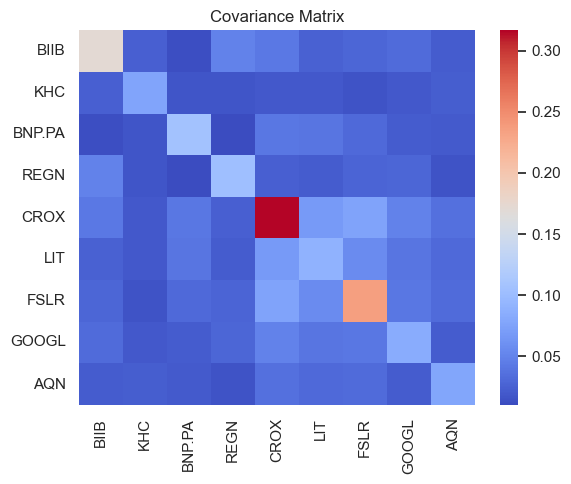

In [ ]:
plt.figure(figsize=(6, 5))
plt.title("Covariance Matrix")
sns.heatmap(log_returns.cov() * 252, annot=False, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [75]:
def portfolio_returns (weights, log_returns=log_returns):
    return np.sum(log_returns.mean() * weights) * 252

def portfolio_volatility (weights, log_returns=log_returns):
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

## Portfolio Selection

## Static Portfolio Allocation

### Portfolio Optimization

#### MC simulation for portfolio weights


In [76]:
number_of_assets = len(data.columns)
number_of_assets

9

In [77]:
from collections import namedtuple

Portfolio = namedtuple('Portfolio', ['returns', 'volatility'])

portfolios = [
    Portfolio(
        returns = portfolio_returns( 
                    weights := (w:= np.random.random(number_of_assets)) / np.sum(w)
        ),
        volatility = portfolio_volatility(weights)
    )
    for _ in range(5000)
]

df_portfolios = pd.DataFrame(portfolios)

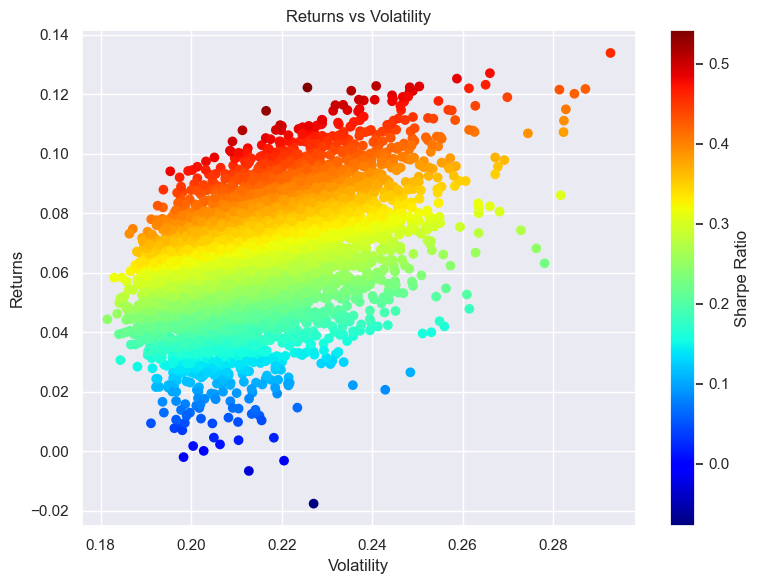

In [78]:
plt.figure(figsize=(8, 6))
plt.title("Returns vs Volatility")
plt.scatter(df_portfolios.volatility, 
            df_portfolios.returns, 
            c=df_portfolios.returns / df_portfolios.volatility,
            marker='o', cmap='jet', 
            alpha=1)
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.colorbar(label="Sharpe Ratio")
plt.tight_layout()
plt.show()


#### Optimization

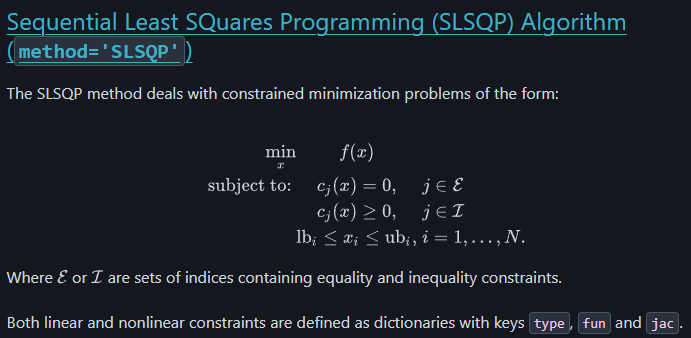

```python
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                         1 - x[0]**2 - x[1],
                                         1 - x[0]**2 + x[1]]),
             'jac' : lambda x: np.array([[-1.0, -2.0],
                                         [-2*x[0], -1.0],
                                         [-2*x[0], 1.0]])}
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
           'jac' : lambda x: np.array([2.0, 1.0])}
```

For the bounds, we can define them as tuples with the desired range. For example, if we want to limit the weights between 0 and 1, we can define the bounds as follows:

```python
bounds = ((0, 1), (0, 1))
```


##### We will optimize this portfolio by **minimizing** the **sharpe ratio**.

In [ ]:
import scipy.optimize as sco

def min_func_sharpe(weights):
    return -portfolio_returns(weights) / portfolio_volatility(weights)

bounds = tuple((0, 1) for asset in range(number_of_assets))

# We want the weights to sum up to 1
eq_constraints = {
    'type': 'eq',
    'fun': lambda x: np.sum(x) - 1
} 

initial_guess = number_of_assets * [1. / number_of_assets]

opt_sharpe = sco.minimize(
    min_func_sharpe,
    x0 = initial_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=eq_constraints
)
print("Optimal Sharpe", -1 * opt_sharpe['fun'])

Optimal Sharpe 0.7025993300262466


In [88]:
x_sharpe = np.array([ value if value > 1e-5 else 0 for value in opt_sharpe.x ])
x_sharpe /= np.sum(x_sharpe)
x_sharpe

array([0.        , 0.        , 0.15992189, 0.        , 0.09409615,
       0.        , 0.00725591, 0.73872605, 0.        ])

##### We will optimize this portfolio by **minimizing** the **volatility $\sigma$**.

In [ ]:
opt_vol = sco.minimize(
    portfolio_volatility,
    x0 = initial_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=eq_constraints
)
x_vol = np.array([ value if value > 1e-5 else 0 for value in opt_vol.x ])
x_vol /= np.sum(x_vol)

print("Min vol returns", portfolio_returns(x_vol))
print("Min vol volatility", portfolio_volatility(x_vol))
print("Min vol sharpe", portfolio_returns(x_vol) / portfolio_volatility(x_vol))

Min vol returns 0.04256160117885501
Min vol volatility 0.18036303167278045
Min vol sharpe 0.23597741058196134


##### Efficient Frontier

I will fix the risk and we will get the best return.

In [96]:
def fun_returns (weights):
    return -portfolio_returns(weights)

expected_volatilities = np.linspace(0.18, 0.3, 50)
optimal_returns = []

for expected_vol in expected_volatilities:
    constraints = ({
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }, {
        'type': 'eq',
        'fun': lambda x: portfolio_volatility(x) - expected_vol
    })
    
    initial_guess = number_of_assets * [1. / number_of_assets]
    bounds = tuple((0, 1) for asset in range(number_of_assets))
    
    opt = sco.minimize(
        fun_returns,
        x0 = initial_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    
    optimal_returns.append(-1 * opt['fun'])

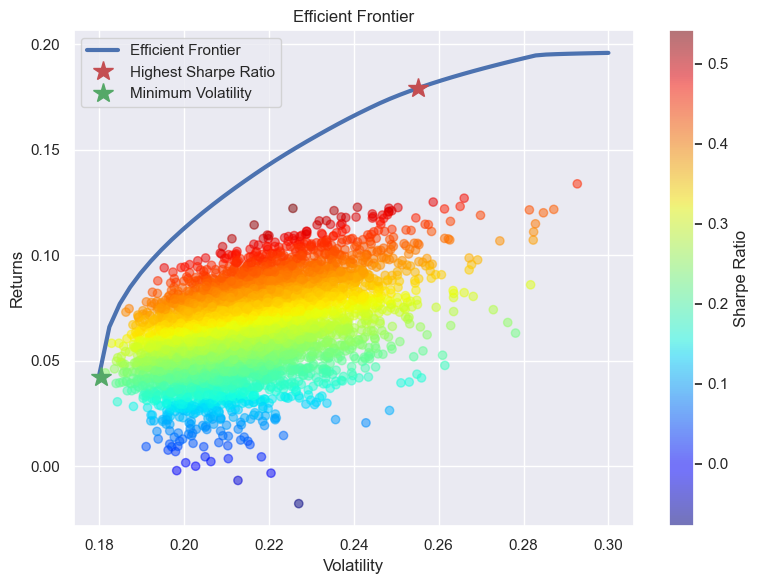

In [106]:
plt.figure(figsize=(8, 6))
plt.title("Efficient Frontier")
plt.scatter(df_portfolios.volatility, 
            df_portfolios.returns, 
            c=df_portfolios.returns / df_portfolios.volatility,
            marker='o', cmap='jet', 
            alpha=0.5)
plt.plot(expected_volatilities, optimal_returns, lw=3, label="Efficient Frontier")
plt.plot(portfolio_volatility(x_sharpe), portfolio_returns(x_sharpe), 
         'r*', markersize=15.0, label="Highest Sharpe Ratio")
plt.plot(portfolio_volatility(x_vol), portfolio_returns(x_vol), 
         'g*', markersize=15.0, label="Minimum Volatility")
plt.legend()
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.colorbar(label="Sharpe Ratio")
plt.tight_layout()
plt.show()

## Dynamic Portfolio Allocation

In [ ]:
def rebalance_portfolio(prices, rebalance_period=6, history_window=12):
    """ Perform dynamic portfolio optimization every 6 months based on 1 year history. """
    rebalancing_dates = prices.resample(f'{rebalance_period}M').last().index
    optimized_weights = []
    portfolio_values = [1]  # Start with an initial portfolio value of 1

    for i in range(history_window, len(rebalancing_dates)):
        start_date = rebalancing_dates[i - history_window]
        end_date = rebalancing_dates[i]
        historical_prices = prices.loc[start_date:end_date]
        returns = historical_prices.pct_change().dropna()
        
        bounds = tuple((0, 1) for _ in range(len(prices.columns)))
        eq_constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        initial_guess = len(prices.columns) * [1. / len(prices.columns)]
        
        opt_sharpe = sco.minimize(
            min_func_sharpe,
            x0=initial_guess,
            args=(returns,),
            method='SLSQP',
            bounds=bounds,
            constraints=eq_constraints
        )
        
        weights = opt_sharpe.x
        optimized_weights.append(weights)
        
        future_returns = prices.loc[end_date:end_date + pd.DateOffset(months=rebalance_period)].pct_change().dropna()
        portfolio_return = np.dot(weights, future_returns.mean())
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
    
    return pd.DataFrame({"Date": rebalancing_dates[history_window:], "Portfolio Value": portfolio_values[1:], "Weights": optimized_weights})


In [129]:
from dateutil.relativedelta import relativedelta

rebalance_period = 6
history_window = 12

rebalancing_dates = data.resample(f'{rebalance_period}ME').last().index

for period in range(int( np.ceil( history_window / rebalance_period)), len(rebalancing_dates)):
    
    start_date = rebalancing_dates[period] - relativedelta(months=history_window)
    end_date = rebalancing_dates[period]
    
    print(start_date, end_date)

2015-07-31 00:00:00 2016-07-31 00:00:00
2016-01-31 00:00:00 2017-01-31 00:00:00
2016-07-31 00:00:00 2017-07-31 00:00:00
2017-01-31 00:00:00 2018-01-31 00:00:00
2017-07-31 00:00:00 2018-07-31 00:00:00
2018-01-31 00:00:00 2019-01-31 00:00:00
2018-07-31 00:00:00 2019-07-31 00:00:00
2019-01-31 00:00:00 2020-01-31 00:00:00
2019-07-31 00:00:00 2020-07-31 00:00:00
2020-01-31 00:00:00 2021-01-31 00:00:00
2020-07-31 00:00:00 2021-07-31 00:00:00
2021-01-31 00:00:00 2022-01-31 00:00:00
2021-07-31 00:00:00 2022-07-31 00:00:00
2022-01-31 00:00:00 2023-01-31 00:00:00
2022-07-31 00:00:00 2023-07-31 00:00:00
2023-01-31 00:00:00 2024-01-31 00:00:00
2023-07-31 00:00:00 2024-07-31 00:00:00
2024-01-31 00:00:00 2025-01-31 00:00:00
2024-07-31 00:00:00 2025-07-31 00:00:00


DatetimeIndex(['2015-07-31', '2016-01-31', '2016-07-31', '2017-01-31',
               '2017-07-31', '2018-01-31', '2018-07-31', '2019-01-31',
               '2019-07-31', '2020-01-31', '2020-07-31', '2021-01-31',
               '2021-07-31', '2022-01-31', '2022-07-31', '2023-01-31',
               '2023-07-31', '2024-01-31', '2024-07-31', '2025-01-31',
               '2025-07-31'],
              dtype='datetime64[ns]', name='Date', freq='6ME')

Timestamp('2015-08-01 00:00:00')

In [ ]:
for period in range(int( np.ceil( history_window / rebalance_period)), len(rebalancing_dates)):
    
    start_date = rebalancing_dates[2] - dt.timedelta(days = 365)
    end_date = rebalancing_dates[i]
    historical_prices = prices.loc[start_date:end_date]
    returns = historical_prices.pct_change().dropna()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
